In [89]:
# Load packages and DF
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

ptbdb_abnormal_df = pd.read_csv("ptbdb_abnormal.csv")
ptbdb_normal_df = pd.read_csv("ptbdb_normal.csv")

In [90]:
# PTBDB Normal
new_column_names = range(1, len(ptbdb_normal_df.columns) + 1)
ptbdb_normal_df.columns = new_column_names
#ptbdb_normal_df.head()
ptbdb_normal_df[188].describe()

count    4045.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: 188, dtype: float64

In [91]:
# PTBDB Abnormal
new_column_names = range(1, len(ptbdb_abnormal_df.columns) + 1)
ptbdb_abnormal_df.columns = new_column_names
#ptbdb_abnormal_df.head()
ptbdb_abnormal_df[188].describe()
#ptbdb_abnormal_df.isna().sum().sum()

count    10505.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: 188, dtype: float64

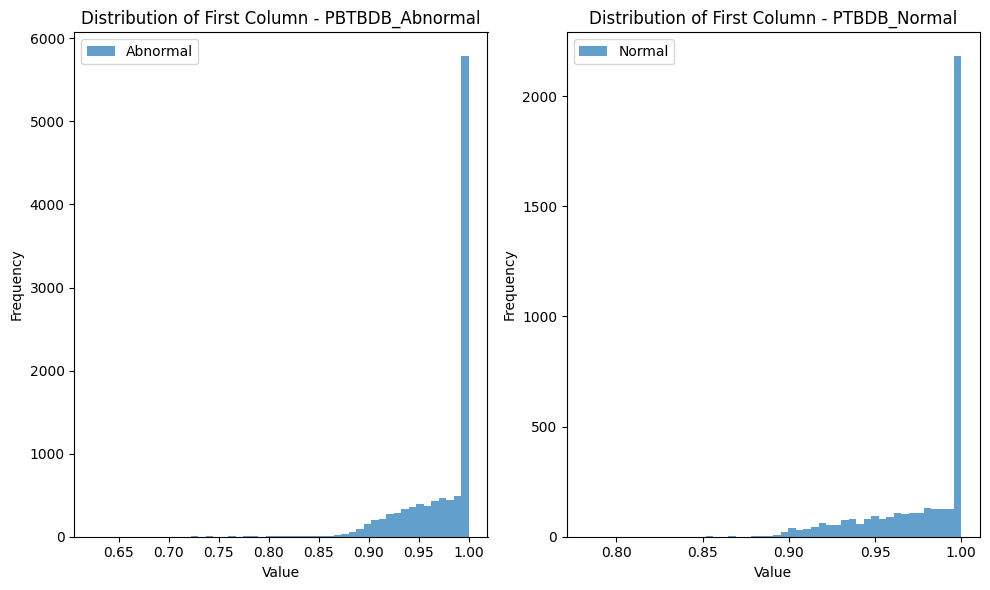

In [92]:
# PTBDB Verteilung Spalte 1
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(ptbdb_abnormal_df.iloc[:, 0], bins=50, alpha=0.7, label='Abnormal')
plt.title('Distribution of First Column - PBTBDB_Abnormal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ptbdb_normal_df.iloc[:, 0], bins=50, alpha=0.7, label='Normal')
plt.title('Distribution of First Column - PTBDB_Normal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [93]:
ptbdb_comb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], ignore_index=True)
# ptbdb_comb_df[1].value_counts()
ptbdb_comb_df[188]=ptbdb_comb_df[188].astype(int)
ptbdb_comb_df.describe()
#ptbdb_comb_df.isna().sum().sum()
#ptbdb_comb_df.shape
#ptbdb_comb_df[188].value_counts()

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
count,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,...,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.0,14550.000000
mean,0.976638,0.721640,0.403068,0.242859,0.207181,0.216410,0.221718,0.224457,0.227325,0.229684,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721993
std,0.034532,0.195694,0.249779,0.249466,0.218030,0.192331,0.180687,0.176900,0.176642,0.176557,...,0.021363,0.021014,0.017317,0.014641,0.014034,0.012290,0.006545,0.006836,0.0,0.448032
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959381,0.584500,0.212294,0.052278,0.061899,0.090473,0.096495,0.097092,0.097225,0.097127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740115,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881478,0.557741,0.336155,0.264083,0.264610,0.286449,0.302235,0.311657,0.325235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [94]:
ptbdb_comb_df.max().max()
ptbdb_comb_df.min().min()

0.0

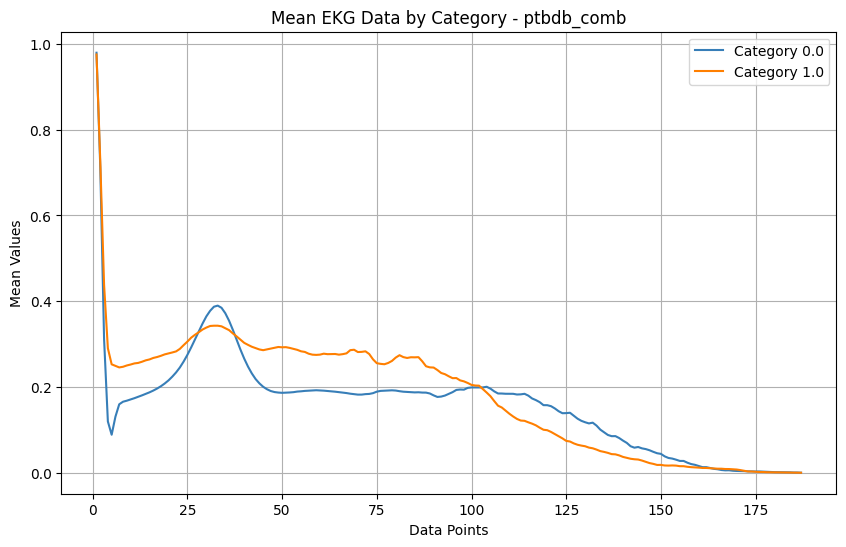

In [95]:
# Grafic representation of the Categories - ptbdb_comb
# Group by the category in the column named '188'
grouped = ptbdb_comb.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - ptbdb_comb')
plt.legend()
plt.grid(True)
plt.show()

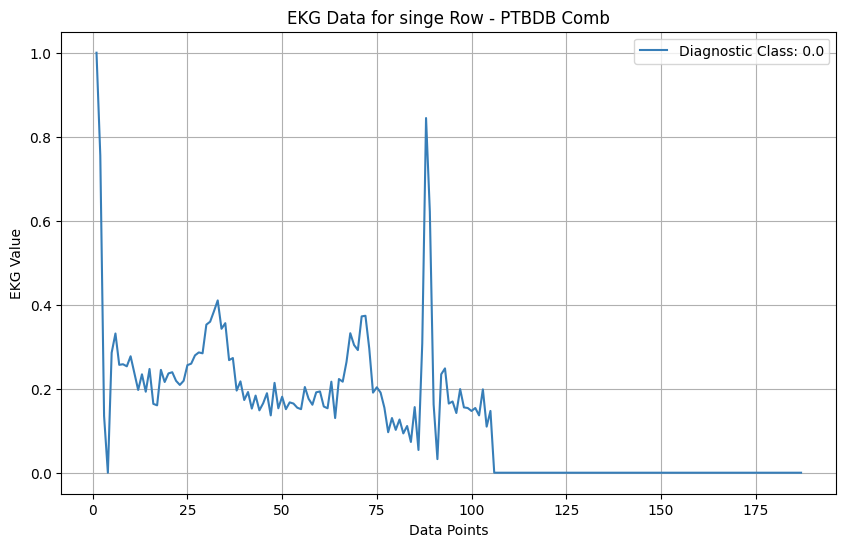

In [96]:
# PTBDB Comb - Single row plot

#Choose Row to display: 
row_to_display = 7

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), ptbdb_comb.iloc[row_to_display, :187], 
         label= f"Diagnostic Class: {ptbdb_comb.iloc[row_to_display, 187]}" , color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title('EKG Data for singe Row - PTBDB Comb')
plt.legend()
plt.grid(True)
plt.show();

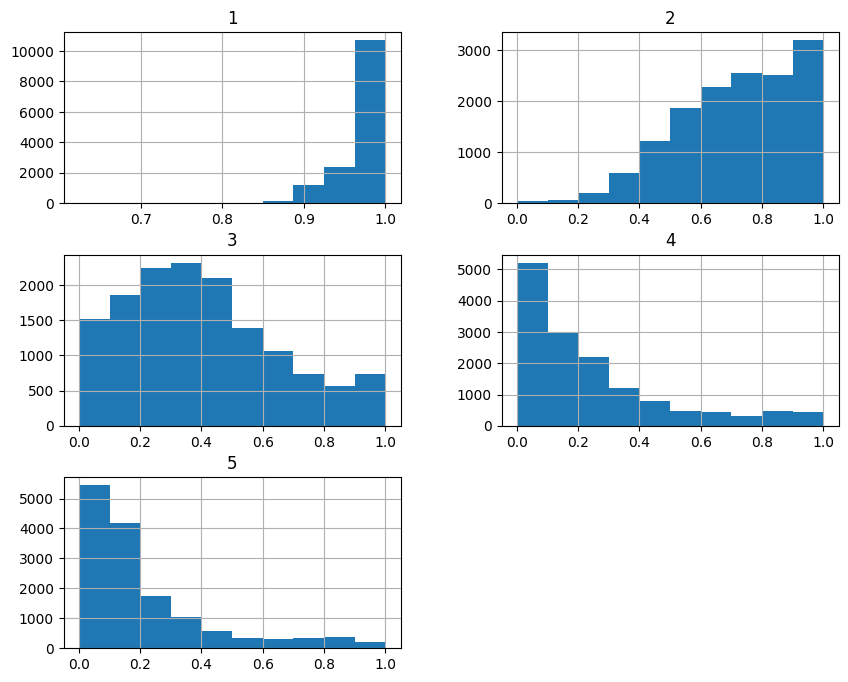

In [97]:
ptbdb_comb_df.iloc[:, :5].hist(figsize=(10, 8))
plt.show()

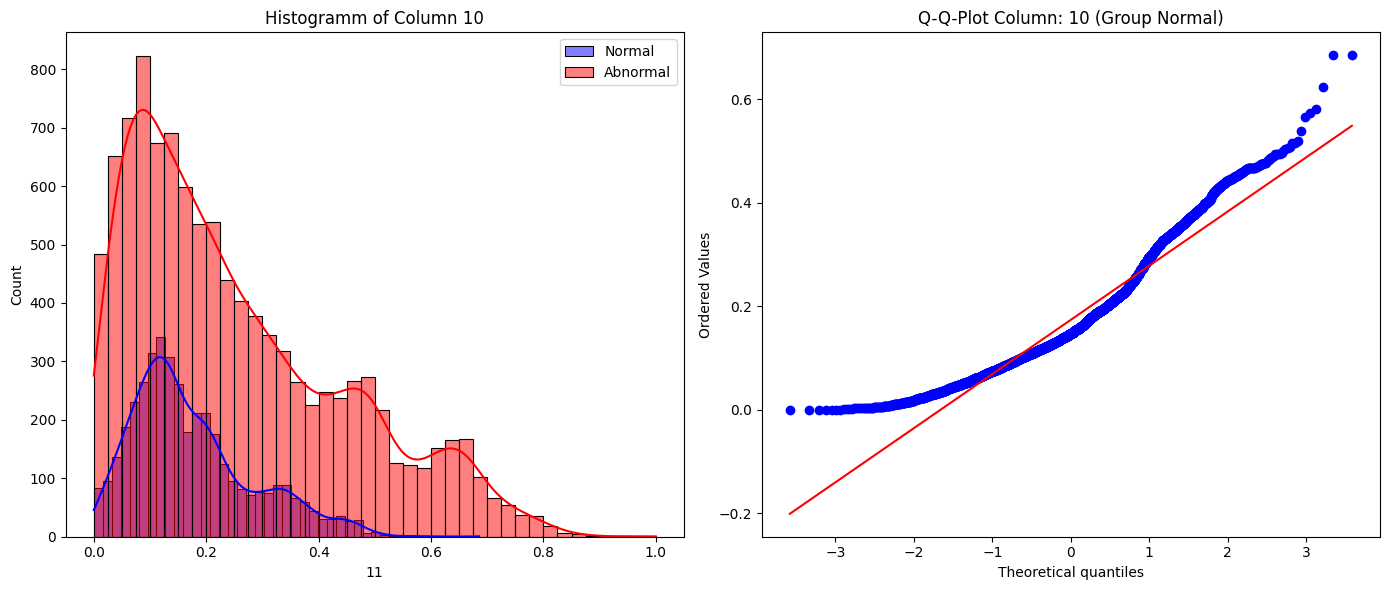

In [98]:
# Normal-Distribution of the variables? - Visual

X = ptbdb_comb_df.iloc[:, :-1]  
y = ptbdb_comb_df.iloc[:, -1]   
normal = X[y == 0]
abnormal = X[y == 1]

plt.figure(figsize=(14, 6))

# Choose Column to Check: 
column = 10

plt.subplot(1, 2, 1)
sns.histplot(normal.iloc[:, column], kde=True, color='blue', label='Normal')
sns.histplot(abnormal.iloc[:, column], kde=True, color='red', label='Abnormal')
plt.legend()
plt.title(f'Histogramm of Column {column}')

plt.subplot(1, 2, 2)
stats.probplot(normal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot Column: {column} (Group Normal)')

plt.tight_layout()
plt.show()

In [99]:
# Check for normal Distribution with Shapiro-Wilk-Test: 

# Choose Column to Check: 
column = 10

def check_normality(data, alpha=0.05):
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    if p > alpha:
        return True  # Data is normal ditributed
    else:
        return False # Date ist not normal distributed 

# Überprüfung der Normalverteilung für die erste Spalte (kann für andere Spalten wiederholt werden)
is_normal_normal_group = check_normality(normal.iloc[:, column])
is_normal_abnormal_group = check_normality(abnormal.iloc[:, column])

print(f'Normal distribution for column {column} in normal group: {is_normal_normal_group}')
print(f'Normal distribution for column {column} in abnormal group: {is_normal_abnormal_group}')

Normal distribution for column 10 in normal group: False
Normal distribution for column 10 in abnormal group: False


In [106]:
# Check for normal Distribution with Shapiro-Wilk-Test (over all Columns)

def check_normality(data, alpha=0.05):
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    return p > alpha, stat, p

normality_results = []
for column in X.columns:
    is_normal_normal_group, stat_normal, p_normal = check_normality(normal[column])
    is_normalabnormal_group, stat_abnormal, p_abnormal = check_normality(abnormal[column])
    normality_results.append({
        'Variable': column,
        'is_normal_normal_group': is_normal_normal_group,
        'ks_stat_normal': stat_normal,
        'p_val_normal': p_normal,
        'is_normal_abnormal_group': is_normal_abnormal_group,
        'ks_stat_abnormal': stat_abnormal,
        'p_val_abnormal': p_abnormal
    })

results_df = pd.DataFrame(normality_results)

# Sort results if needed: 
# sorted_results_df = results_df.sort_values(by='p_val_normal')

# Data filtering to identify variables:
filtered_results_df = results_df[
    (results_df['is_normal_normal_group'] == True) &
    (results_df['is_normal_abnormal_group'] == True)]

results_df.head()
filtered_results_df.info()

# None of the explanatory variables is normal distributed. 

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Variable                  0 non-null      int64  
 1   is_normal_normal_group    0 non-null      bool   
 2   ks_stat_normal            0 non-null      float64
 3   p_val_normal              0 non-null      float64
 4   is_normal_abnormal_group  0 non-null      bool   
 5   ks_stat_abnormal          0 non-null      float64
 6   p_val_abnormal            0 non-null      float64
dtypes: bool(2), float64(4), int64(1)
memory usage: 0.0 bytes


c:\Users\maxgl\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\scipy\stats\_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [100]:
# t-Test between normal and abnormal - for a single row - DO NOT USE !!! - NOT NORMAL Distributed

normal = ptbdb_normal_df.iloc[:, :-1]
abnormal = ptbdb_abnormal_df.iloc[:, :-1]

# t-Test for the first row: 
t_stat, p_val = stats.ttest_ind(normal.iloc[:, 0], abnormal.iloc[:, 0])
print(f't-Test Ergebnis: t_stat = {t_stat}, p_val = {p_val}')

t-Test Ergebnis: t_stat = 6.571209770081918, p_val = 5.160554409319098e-11


In [101]:
# t-Test between normal and abnormal - Over all rows - DO NOT USE !!! - NOT NORMAL Distributed

X = ptbdb_comb_df.iloc[:, :-1]  
y = ptbdb_comb_df.iloc[:, -1]  

normal = X[y == 0]
abnormal = X[y == 1]

t_stats = []
p_values = []

# Loop over all columns (explanatory variables) and perform the t-test
for column in X.columns:
    t_stat, p_val = stats.ttest_ind(normal[column], abnormal[column])
    t_stats.append(t_stat)
    p_values.append(p_val)

# Create a DataFrame with the results
results = pd.DataFrame({
    'Variable': X.columns,
    't_stat': t_stats,
    'p_val': p_values
})

# Optional filtering of results to display only significant p-values
significant_results = results[results['p_val'] < 0.05]
#print(significant_results)

results

,Variable,t_stat,p_val
0,1,6.571210,5.160554e-11
1,2,-3.903725,9.515068e-05
2,3,-28.124217,1.633351e-169
3,4,-38.855655,0.000000e+00
4,5,-43.237566,0.000000e+00
...,...,...,...
182,183,1.763924,7.776582e-02
183,184,2.556429,1.058534e-02
184,185,3.168739,1.534187e-03
185,186,3.158804,1.587421e-03
